In [55]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

# Importaciones:
# Beautifulsoup
from bs4 import BeautifulSoup

# Requests
import requests

# Importar librerías para automatización de navegadores web con Selenium
# -----------------------------------------------------------------------
from selenium import webdriver  # Selenium es una herramienta para automatizar la interacción con navegadores web.
from webdriver_manager.chrome import ChromeDriverManager  # ChromeDriverManager gestiona la instalación del controlador de Chrome.
from selenium.webdriver.common.keys import Keys  # Keys es útil para simular eventos de teclado en Selenium.
from selenium.webdriver.support.ui import Select  # Select se utiliza para interactuar con elementos <select> en páginas web.
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException # Excepciones comunes de selenium que nos podemos encontrar 


# Importar librerías para pausar la ejecución
# -----------------------------------------------------------------------
from time import sleep  # Sleep se utiliza para pausar la ejecución del programa por un número de segundos.

# Librerías para tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

import sys
sys.path.append("../")
from src import soporte

import dotenv
from dotenv import load_dotenv
import os

In [56]:
load_dotenv()
rapidapi_token = os.getenv("token")

In [61]:
#Usaremos la API de BOOKING para una familia

# código parís: "-1456928"
# código Madrid : "-390625"

import requests

url = "https://booking-com.p.rapidapi.com/v1/hotels/search"

querystring = {"children_ages":"12,12","page_number":"0","adults_number":"2","children_number":"2","room_number":"2","include_adjacency":"true","units":"metric","categories_filter_ids":"class::2,class::4,free_cancellation::1","checkout_date":"2024-11-25","dest_id":"-1456928","filter_by_currency":"EUR","dest_type":"city","checkin_date":"2024-11-22","order_by":"popularity","locale":"fr"}

headers = {
	"x-rapidapi-key": rapidapi_token,
	"x-rapidapi-host": "booking-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

dic_fam_aloj = (response.json())


In [ ]:
dic_fam_aloj

In [ ]:
import pandas as pd

# Aquí se asume que tu diccionario JSON está almacenado en la variable "data"
data = {
    # aquí va todo el diccionario JSON completo
}

# Lista para almacenar los datos
hoteles_info = []

# Iterar por cada hotel en los resultados
for hotel in dic_fam_aloj['result']:
    # Extraer el precio final "all_inclusive_price"
    precio_final = hotel.get('min_total_price', 'N/A')  # Extrae el precio final
    
    # Recopilar los datos relevantes para cada hotel
    hotel_info = {
        'Nombre': hotel.get('hotel_name', 'N/A'),
        'Puntuación Reseña': hotel.get('review_score_word', 'N/A').strip(),
        'Distancia Centro': hotel.get('distance', 'N/A'),
        'Ciudad': hotel.get('city_trans', 'N/A'),
        'Dirección': hotel.get('address', 'N/A'),
        'Precio Final (€)': precio_final  # Precio final extraído aquí
    }
    hoteles_info.append(hotel_info)

# Convertir a DataFrame
df_hoteles = pd.DataFrame(hoteles_info)

# Mostrar el DataFrame resultante
print(df_hoteles)


# Si deseas visualizar gráficamente los datos de precios
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna de precio a float (si no es ya float)
df_hoteles['Precio Final (€)'] = pd.to_numeric(df_hoteles['Precio Final (€)'], errors='coerce')

# Crear un boxplot de los precios finales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hoteles, y='Precio Final (€)')
plt.title('Distribución de Precios Finales de Hoteles en parís para una familia')
plt.show()



In [73]:
#Usaremos la API de BOOKING para una pareja

# código parís: "-1456928"
# código Madrid : "-390625"

import requests

url = "https://booking-com.p.rapidapi.com/v1/hotels/search"

querystring = {"page_number":"0","adults_number":"2","room_number":"1","units":"metric","categories_filter_ids":"class::2,class::4,free_cancellation::1","checkout_date":"2024-11-25","dest_id":"-1456928","filter_by_currency":"EUR","dest_type":"city","checkin_date":"2024-11-22","order_by":"popularity","locale":"fr"}

headers = {
	"x-rapidapi-key": rapidapi_token,
	"x-rapidapi-host": "booking-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

dic_pareja_aloj = (response.json())


In [74]:
dic_pareja_aloj

{'primary_count': 2036,
 'count': 2036,
 'room_distribution': [{'children': [], 'adults': '2'}],
 'map_bounding_box': {'sw_lat': 48.8195241419451,
  'ne_long': 2.41622909903526,
  'sw_long': 2.23678529262543,
  'ne_lat': 48.9017882517733},
 'total_count_with_filters': 2036,
 'unfiltered_count': 13064,
 'extended_count': 0,
 'unfiltered_primary_count': 13064,
 'search_radius': 0.0,
 'sort': [{'name': 'Distance du centre-ville', 'id': 'distance'},
  {'name': 'Popularité', 'id': 'popularity'},
  {'id': 'class_descending', 'name': 'Étoiles (5 à 0)'},
  {'id': 'class_ascending', 'name': 'Étoiles (0 à 5)'},
  {'id': 'bayesian_review_score', 'name': 'Note des commentaires clients'},
  {'name': 'Tarif (du - cher au + cher)', 'id': 'price'}],
 'result': [{'hotel_id': 6523595,
   'price_is_final': 1,
   'review_nr': 2965,
   'city_trans': 'Paris',
   'review_score_word': 'Bien\xa0',
   'currencycode': 'EUR',
   'hotel_name_trans': 'Hôtel La Sanguine',
   'zip': '75008',
   'is_beach_front': 0,
 

                                       Nombre Puntuación Reseña  \
0                           Hôtel La Sanguine              Bien   
1   Appart'City Collection Paris Gare de Lyon          Fabuleux   
2       Appart'City Classic Paris La Villette              Bien   
3                          Hotel Armoni Paris         Très bien   
4                        Mercure Paris Alesia         Très bien   
5                        Hotel Monceau Wagram              Bien   
6                        Grand Hôtel De Paris              Bien   
7                                Amiral Hôtel              Bien   
8                               Drawing House          Fabuleux   
9     Kopster Hotel Paris Porte de Versailles         Très bien   
10                 Hotel Villa Romantic & Spa           Superbe   
11            B&B HOTEL Paris Porte des Lilas              Bien   
12                                      D'win              Bien   
13                  Pullman Paris Tour Eiffel         Très bie

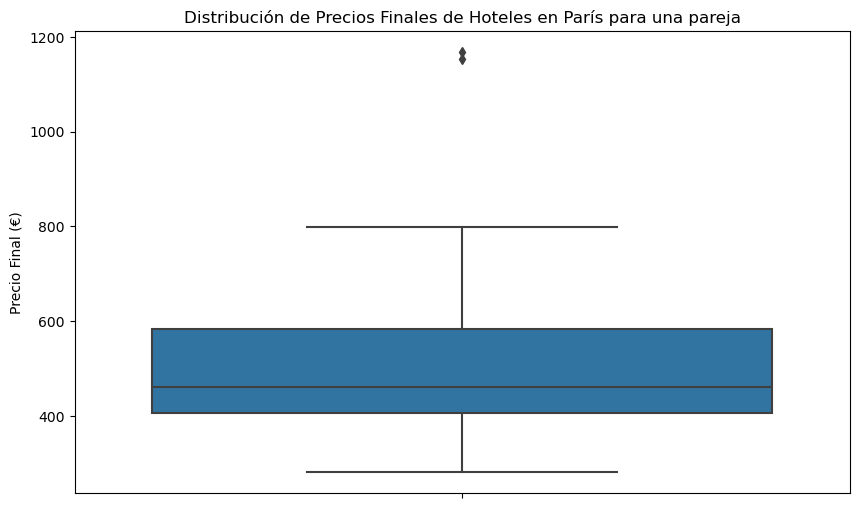

In [75]:
import pandas as pd



# Lista para almacenar los datos
hoteles_info = []

# Iterar por cada hotel en los resultados
for hotel in dic_pareja_aloj['result']:
    # Extraer el precio final "all_inclusive_price"
    precio_final = hotel.get('min_total_price', 'N/A')  # Extrae el precio final
    
    # Recopilar los datos relevantes para cada hotel
    hotel_info = {
        'Nombre': hotel.get('hotel_name', 'N/A'),
        'Puntuación Reseña': hotel.get('review_score_word', 'N/A').strip(),
        'Distancia Centro': hotel.get('distance', 'N/A'),
        'Ciudad': hotel.get('city_trans', 'N/A'),
        'Dirección': hotel.get('address', 'N/A'),
        'Precio Final (€)': precio_final  # Precio final extraído aquí
    }
    hoteles_info.append(hotel_info)

# Convertir a DataFrame
df_hoteles = pd.DataFrame(hoteles_info)

# Mostrar el DataFrame resultante
print(df_hoteles)


# Si deseas visualizar gráficamente los datos de precios
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna de precio a float (si no es ya float)
df_hoteles['Precio Final (€)'] = pd.to_numeric(df_hoteles['Precio Final (€)'], errors='coerce')

# Crear un boxplot de los precios finales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hoteles, y='Precio Final (€)')
plt.title('Distribución de Precios Finales de Hoteles en París para una pareja')
plt.show()



In [77]:
#Usaremos la API de BOOKING para un grupo de amigos
#Como son 5, cogeremos dos habitaciones que no tienen por qué ser adyacentes

# código parís: "-1456928"
# código Madrid : "-390625"

import requests

url = "https://booking-com.p.rapidapi.com/v1/hotels/search"

querystring = {"page_number":"0","adults_number":"5","room_number":"2","include_adjacency":"false","units":"metric","categories_filter_ids":"class::2,class::4,free_cancellation::1","checkout_date":"2024-11-25","dest_id":"-1456928","filter_by_currency":"EUR","dest_type":"city","checkin_date":"2024-11-22","order_by":"popularity","locale":"fr"}

headers = {
	"x-rapidapi-key": rapidapi_token,
	"x-rapidapi-host": "booking-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

dic_amigos_aloj = (response.json())


                                               Nombre Puntuación Reseña  \
0        Superbe appartement- 7P- Sacré Coeur Ramey I         Très bien   
1                             Pere Lachaise Apartment           Superbe   
2                                             Arigato         Très bien   
3   Appartement parisien branché à 10 min de Bastille              Bien   
4               Appartement lumineux et spacieux - 8P         Très bien   
5   Amazing 2 Rooms Flat near Bastille - An Ecoloflat         Très bien   
6                 Large Flat Very Close to Montmartre          Fabuleux   
7             Odéon - Notre Dame Paris Climatisé-Wifi          Fabuleux   
8                      Appartement spacieux et rénové           Superbe   
9                  Appartement Quartier Tour Eiffel 7                     
10                          Résidence Charles Floquet          Fabuleux   
11                  Moderne pieds a terre a Oberkampf         Très bien   
12     1596 - Unique Auth

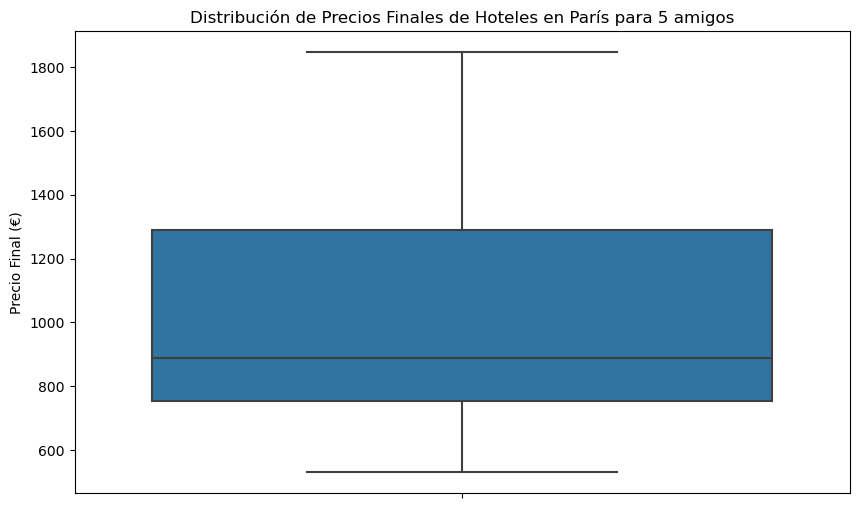

In [80]:
import pandas as pd



# Lista para almacenar los datos
hoteles_info = []

# Iterar por cada hotel en los resultados
for hotel in dic_amigos_aloj['result']:
    # Extraer el precio final "all_inclusive_price"
    precio_final = hotel.get('min_total_price', 'N/A')  # Extrae el precio final
    
    # Recopilar los datos relevantes para cada hotel
    hotel_info = {
        'Nombre': hotel.get('hotel_name', 'N/A'),
        'Puntuación Reseña': hotel.get('review_score_word', 'N/A').strip(),
        'Distancia Centro': hotel.get('distance', 'N/A'),
        'Ciudad': hotel.get('city_trans', 'N/A'),
        'Dirección': hotel.get('address', 'N/A'),
        'Precio Final (€)': precio_final  # Precio final extraído aquí
    }
    hoteles_info.append(hotel_info)

# Convertir a DataFrame
df_hoteles = pd.DataFrame(hoteles_info)

# Mostrar el DataFrame resultante
print(df_hoteles)


# Si deseas visualizar gráficamente los datos de precios
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna de precio a float (si no es ya float)
df_hoteles['Precio Final (€)'] = pd.to_numeric(df_hoteles['Precio Final (€)'], errors='coerce')

# Crear un boxplot de los precios finales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hoteles, y='Precio Final (€)')
plt.title('Distribución de Precios Finales de Hoteles en París para 5 amigos')
plt.show()



In [81]:
#Para un viajero aventurero


# código parís: "-1456928"
# código Madrid : "-390625"

import requests

url = "https://booking-com.p.rapidapi.com/v1/hotels/search"

querystring = {"page_number":"0","adults_number":"1","room_number":"1","include_adjacency":"false","units":"metric","categories_filter_ids":"class::2,class::4,free_cancellation::1","checkout_date":"2024-11-25","dest_id":"-1456928","filter_by_currency":"EUR","dest_type":"city","checkin_date":"2024-11-22","order_by":"popularity","locale":"fr"}

headers = {
	"x-rapidapi-key": rapidapi_token,
	"x-rapidapi-host": "booking-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

dic_aventurero_aloj = (response.json())

                                       Nombre Puntuación Reseña  \
0                           Hôtel La Sanguine              Bien   
1                           Hotel de l'Europe          Agréable   
2   Appart'City Collection Paris Gare de Lyon          Fabuleux   
3       Appart'City Classic Paris La Villette              Bien   
4       ibis budget Paris Porte De Montmartre          Agréable   
5                        Grand Hôtel De Paris              Bien   
6               Hotel CIS Paris Maurice Ravel              Bien   
7                  Hotel Villa Romantic & Spa           Superbe   
8                        Hotel Monceau Wagram              Bien   
9                               Hotel Aviatic              Bien   
10                   Hôtel Petit Saint-Honoré              Bien   
11            B&B HOTEL Paris Porte des Lilas              Bien   
12                     Hôtel Liège Strasbourg              Bien   
13                       Mercure Paris Alesia         Très bie

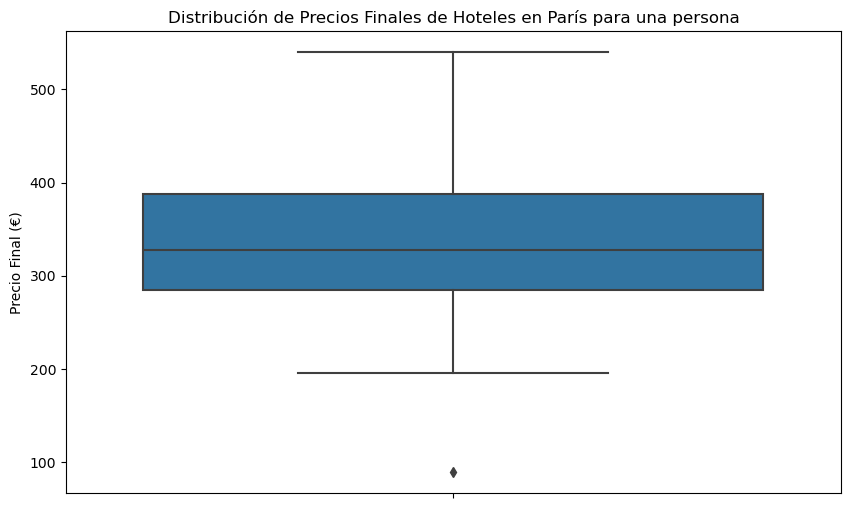

In [83]:
import pandas as pd



# Lista para almacenar los datos
hoteles_info = []

# Iterar por cada hotel en los resultados
for hotel in dic_aventurero_aloj['result']:
    # Extraer el precio final "all_inclusive_price"
    precio_final = hotel.get('min_total_price', 'N/A')  # Extrae el precio final
    
    # Recopilar los datos relevantes para cada hotel
    hotel_info = {
        'Nombre': hotel.get('hotel_name', 'N/A'),
        'Puntuación Reseña': hotel.get('review_score_word', 'N/A').strip(),
        'Distancia Centro': hotel.get('distance', 'N/A'),
        'Ciudad': hotel.get('city_trans', 'N/A'),
        'Dirección': hotel.get('address', 'N/A'),
        'Precio Final (€)': precio_final  # Precio final extraído aquí
    }
    hoteles_info.append(hotel_info)

# Convertir a DataFrame
df_hoteles = pd.DataFrame(hoteles_info)

# Mostrar el DataFrame resultante
print(df_hoteles)


# Si deseas visualizar gráficamente los datos de precios
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna de precio a float (si no es ya float)
df_hoteles['Precio Final (€)'] = pd.to_numeric(df_hoteles['Precio Final (€)'], errors='coerce')

# Crear un boxplot de los precios finales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hoteles, y='Precio Final (€)')
plt.title('Distribución de Precios Finales de Hoteles en París para una persona')
plt.show()

